# Goal
Get an answer purely by multiplying shit together

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import lightgbm as lgb
from sklearn.metrics import mean_absolute_percentage_error

In [3]:
DIRECTORY = '../data/'
train = pd.read_csv(DIRECTORY + 'train.csv', parse_dates=['date']).drop(columns='id')
test = pd.read_csv(DIRECTORY + 'test.csv', parse_dates=['date']).drop(columns='id')

## Question: Are the different factors just multiplicative???

- Is country, store, product effect just a multiplier?

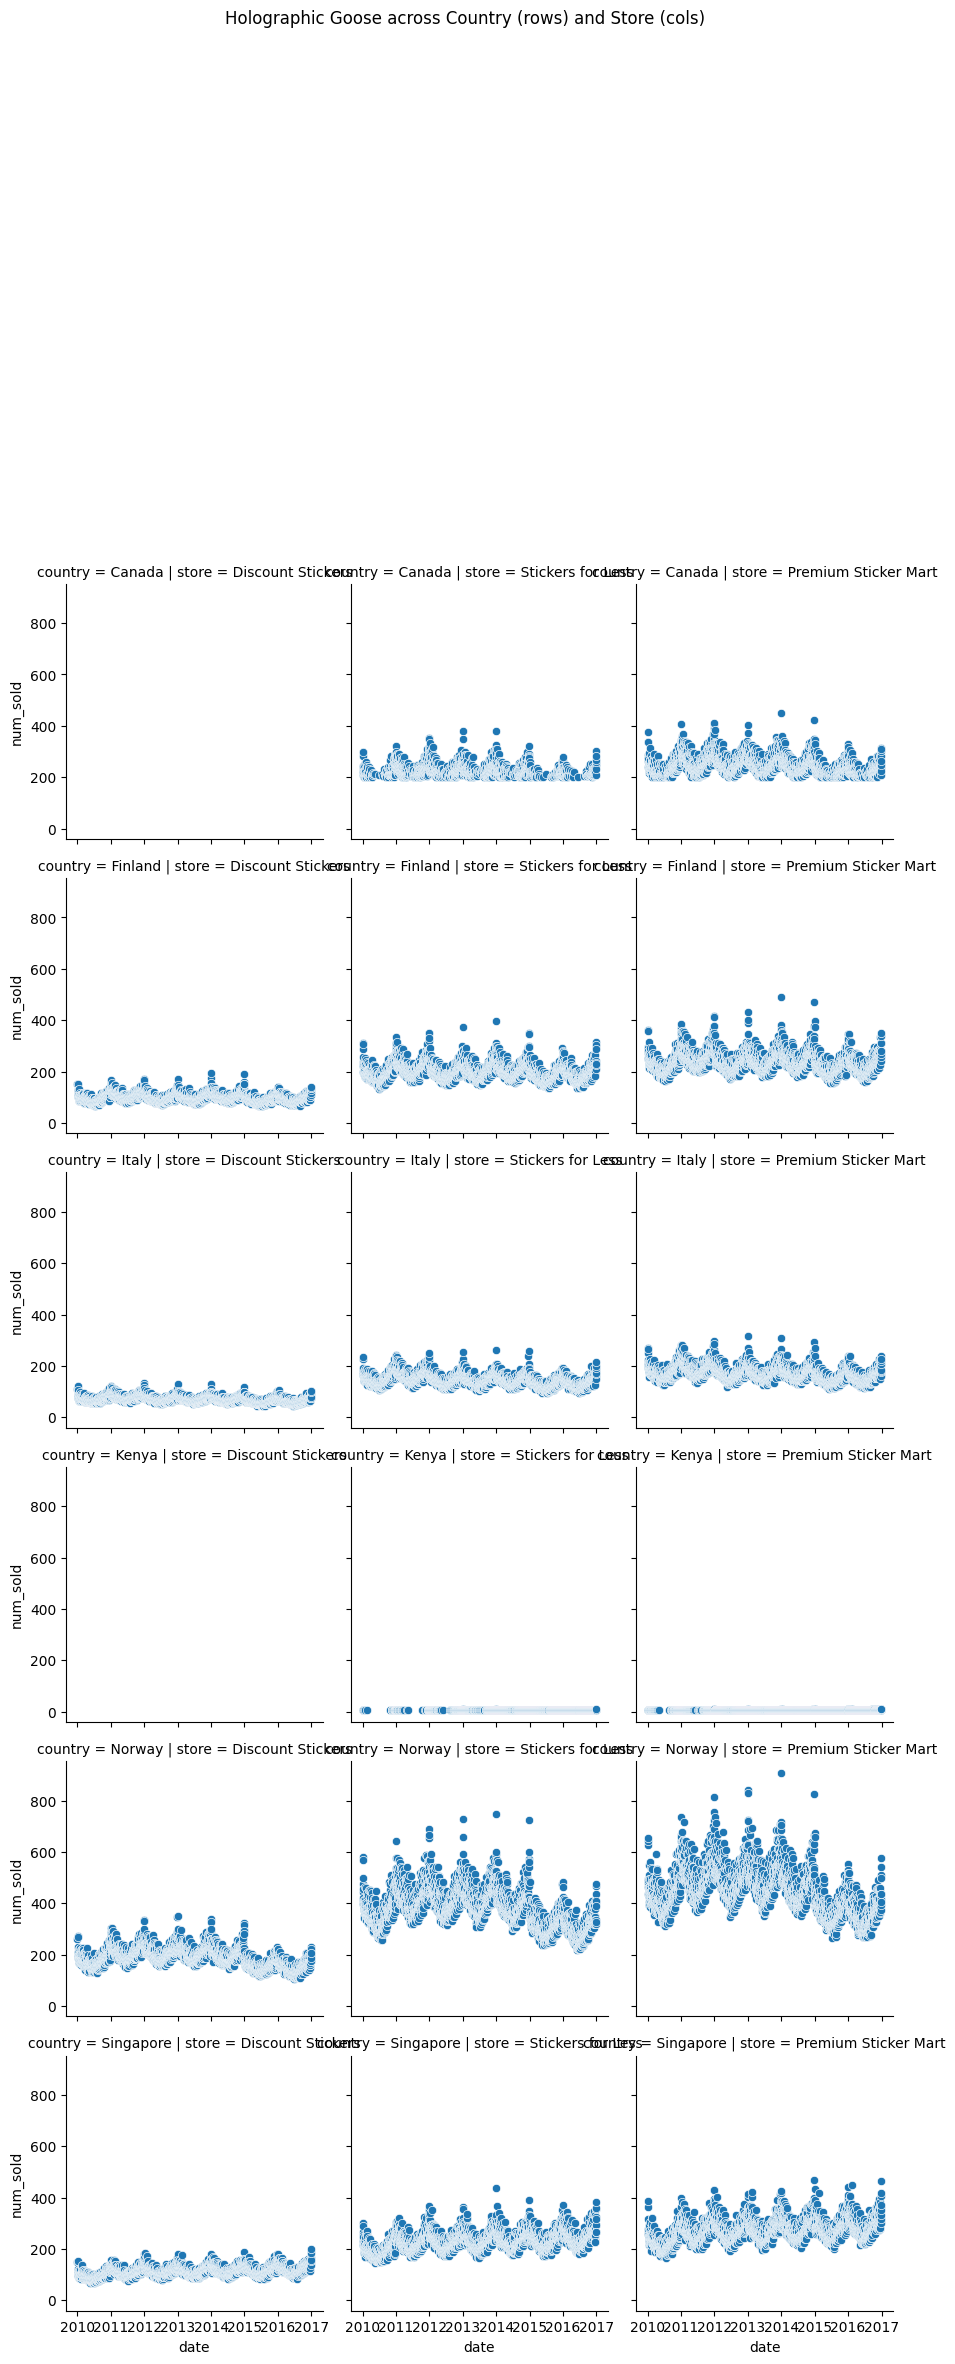

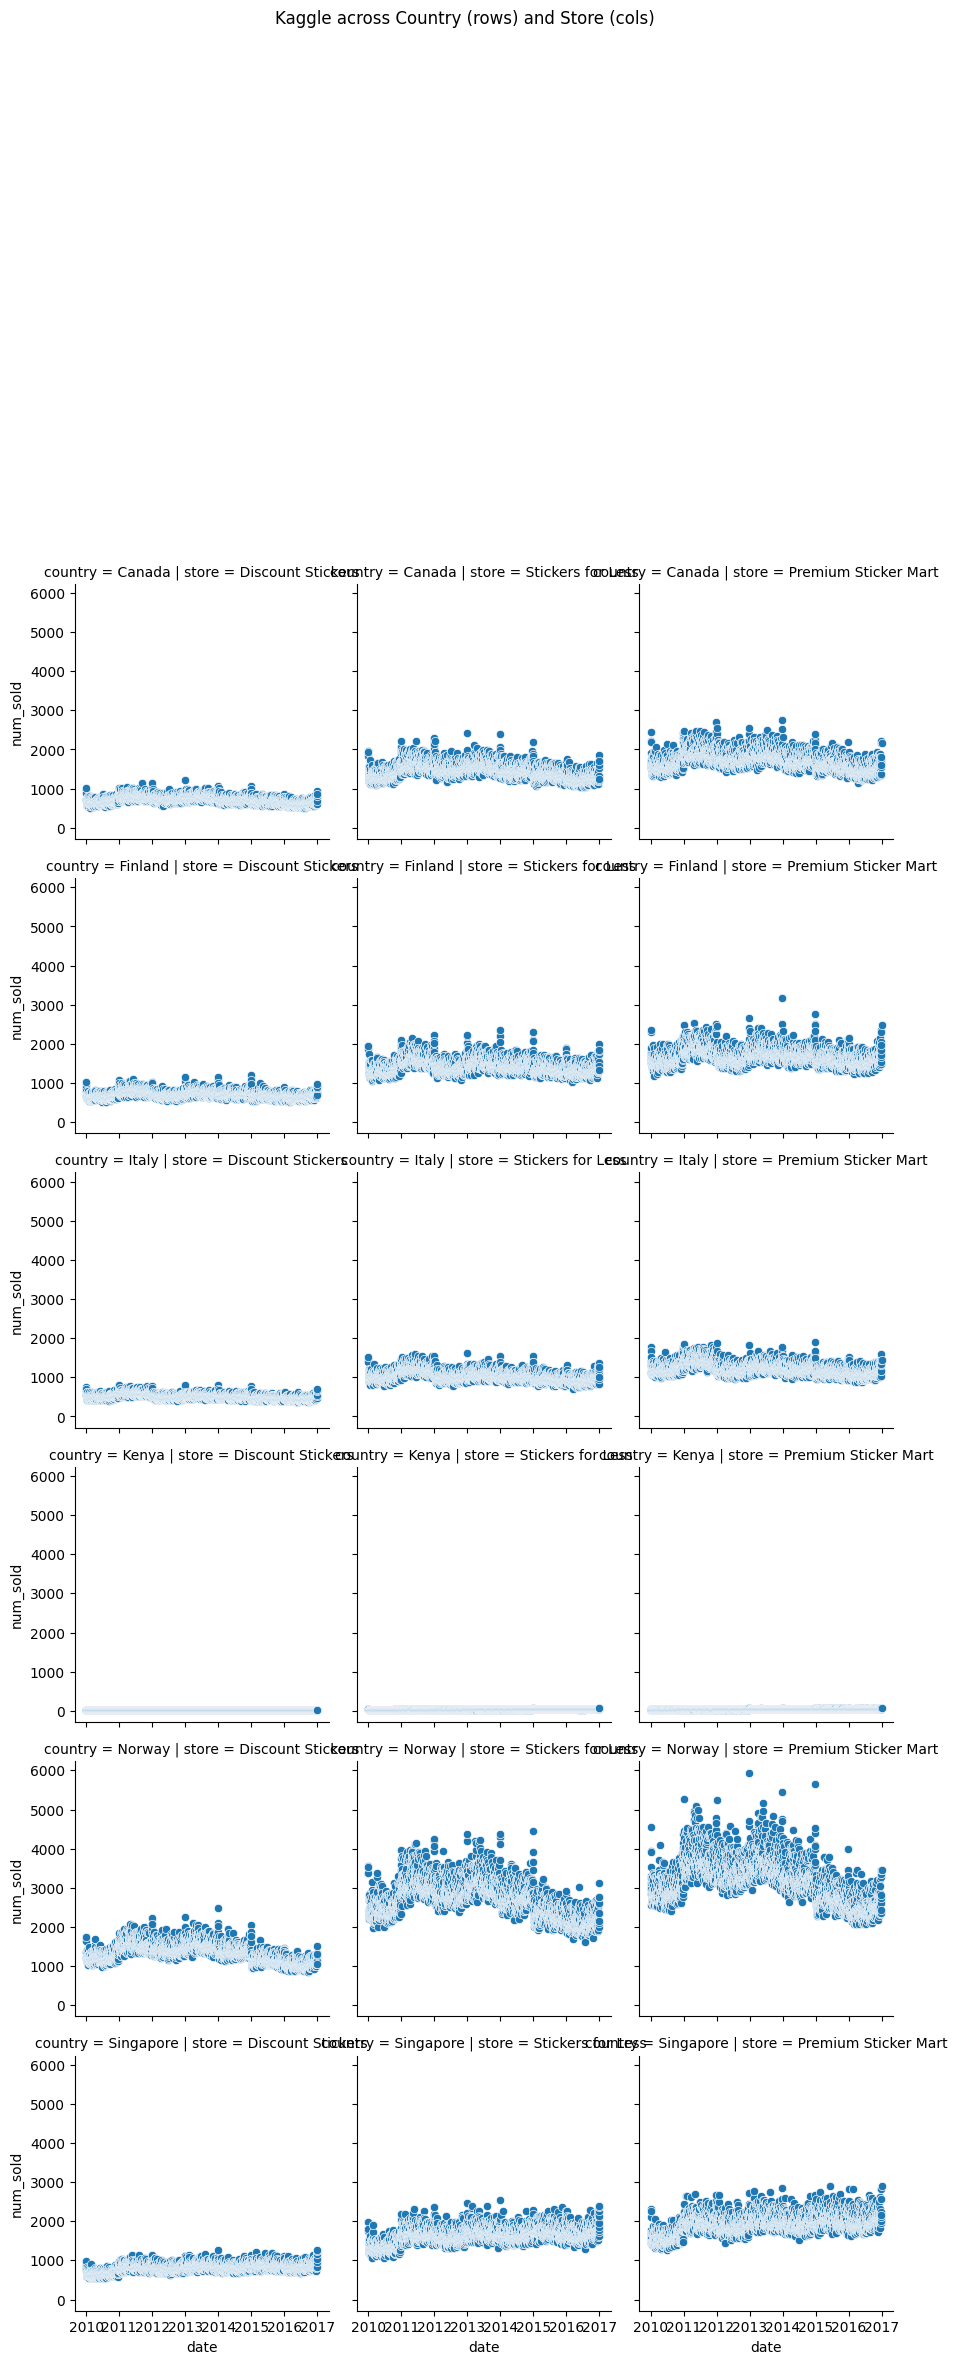

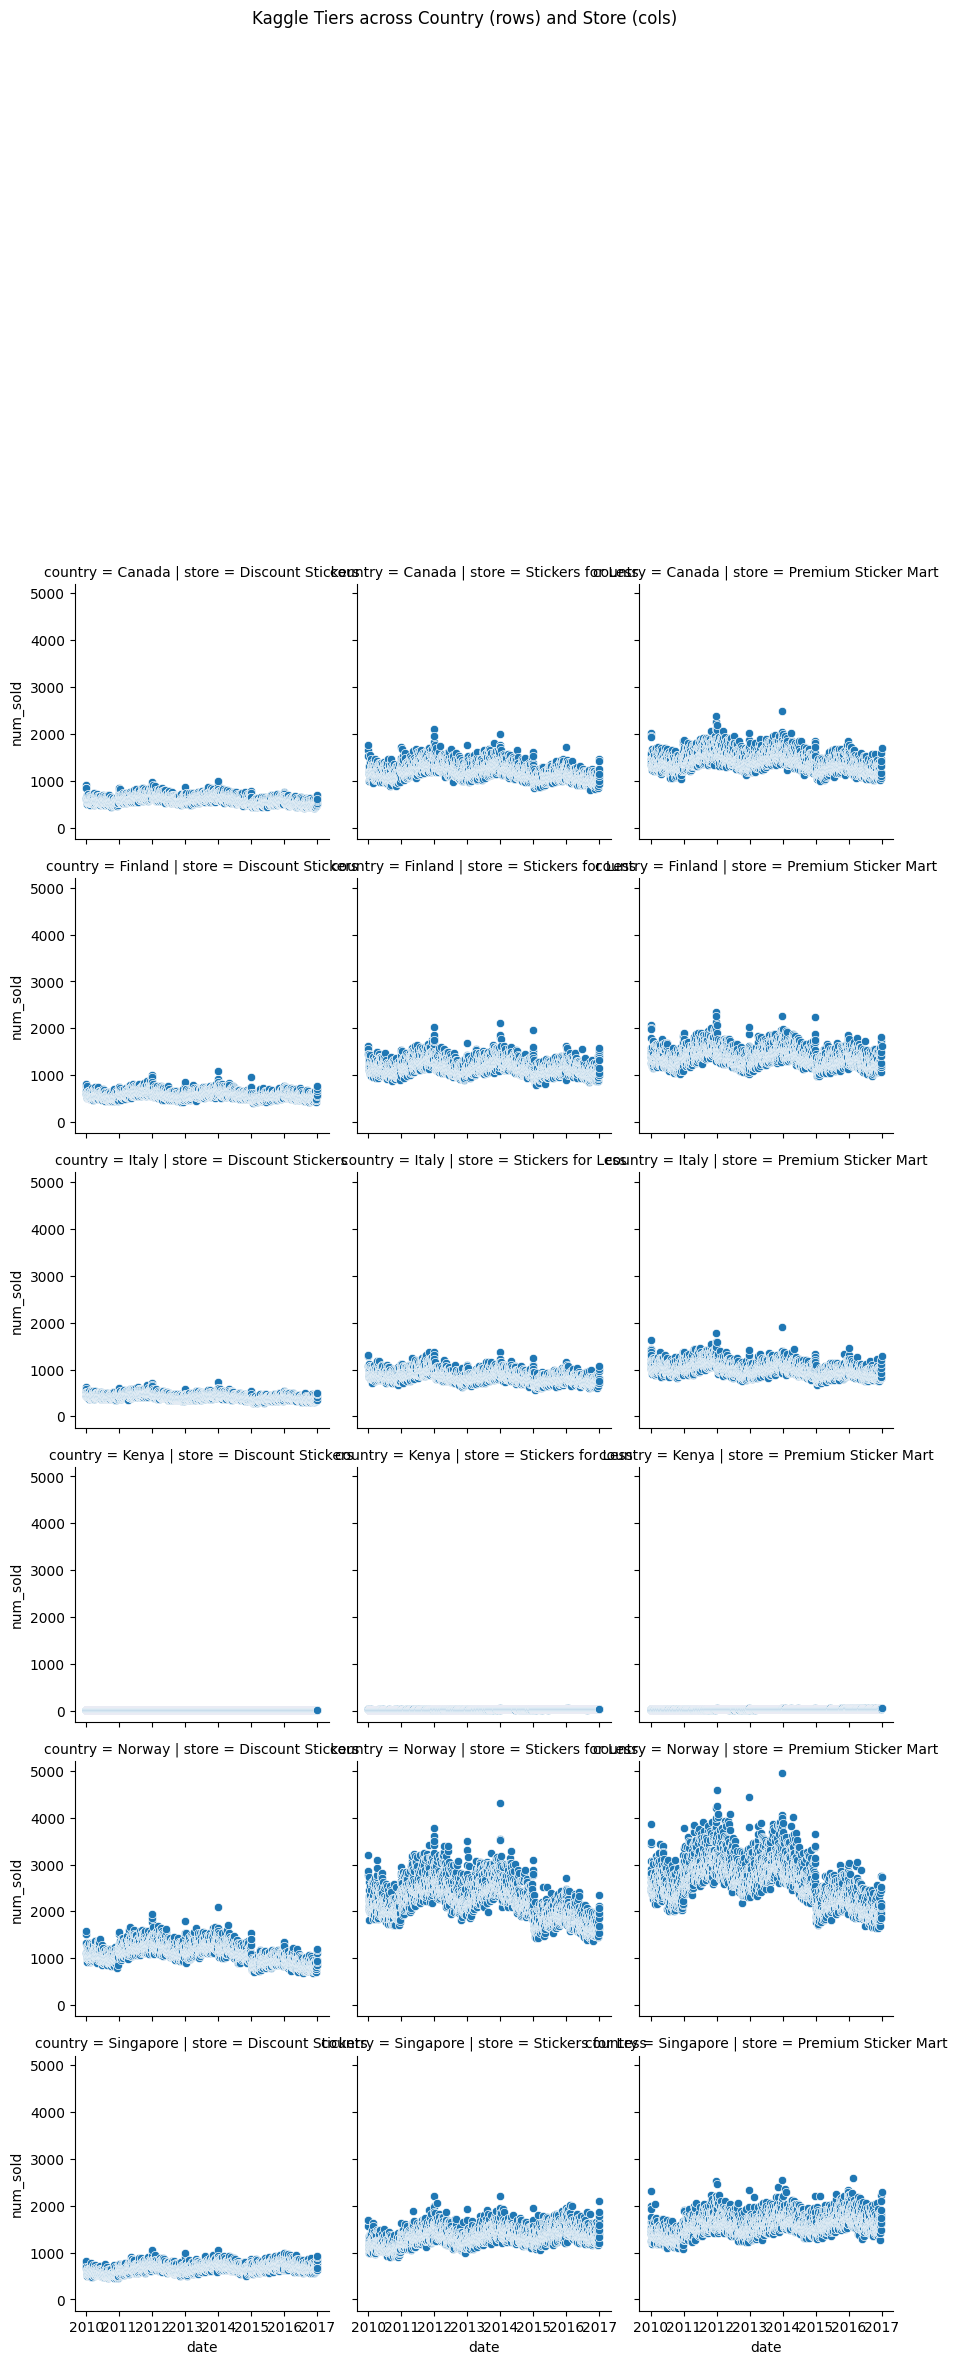

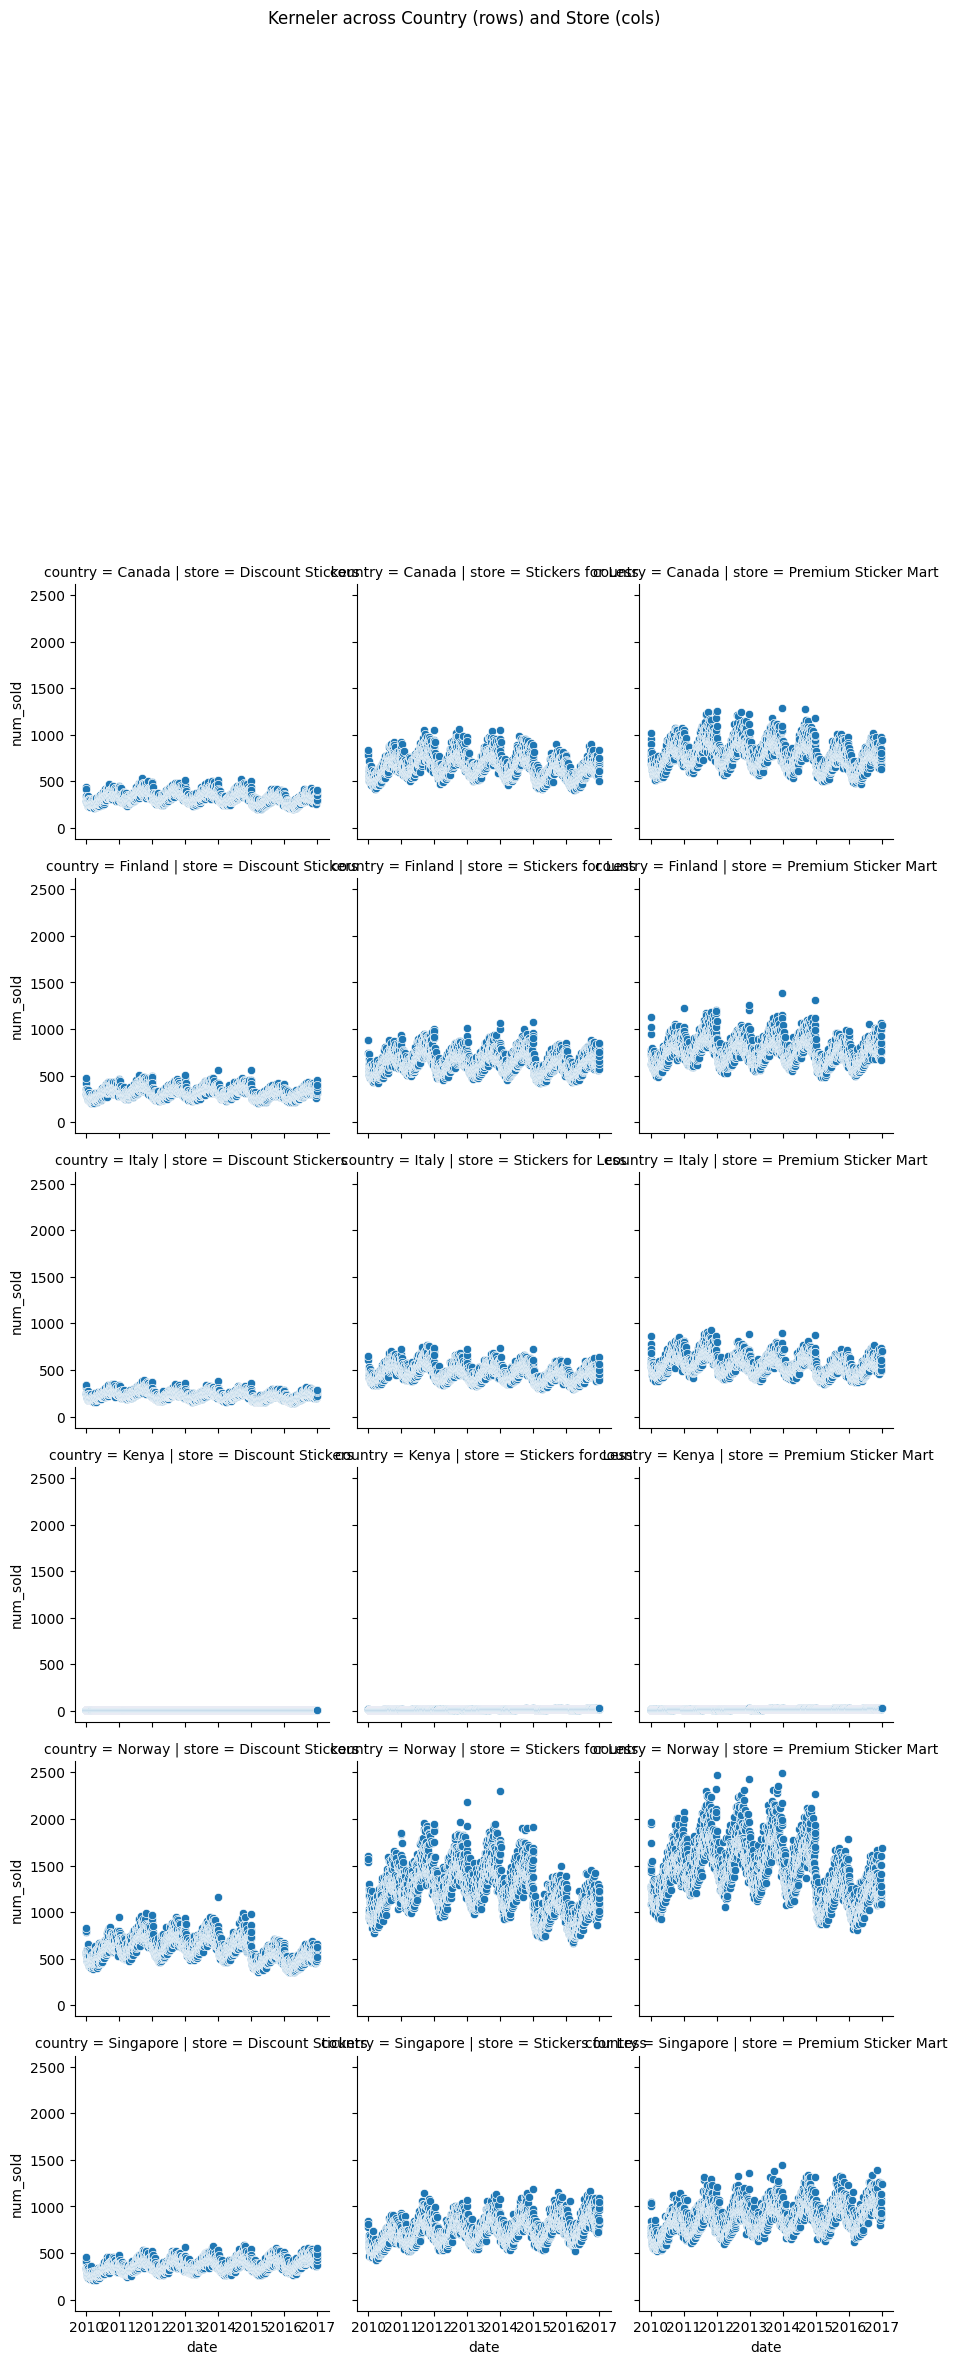

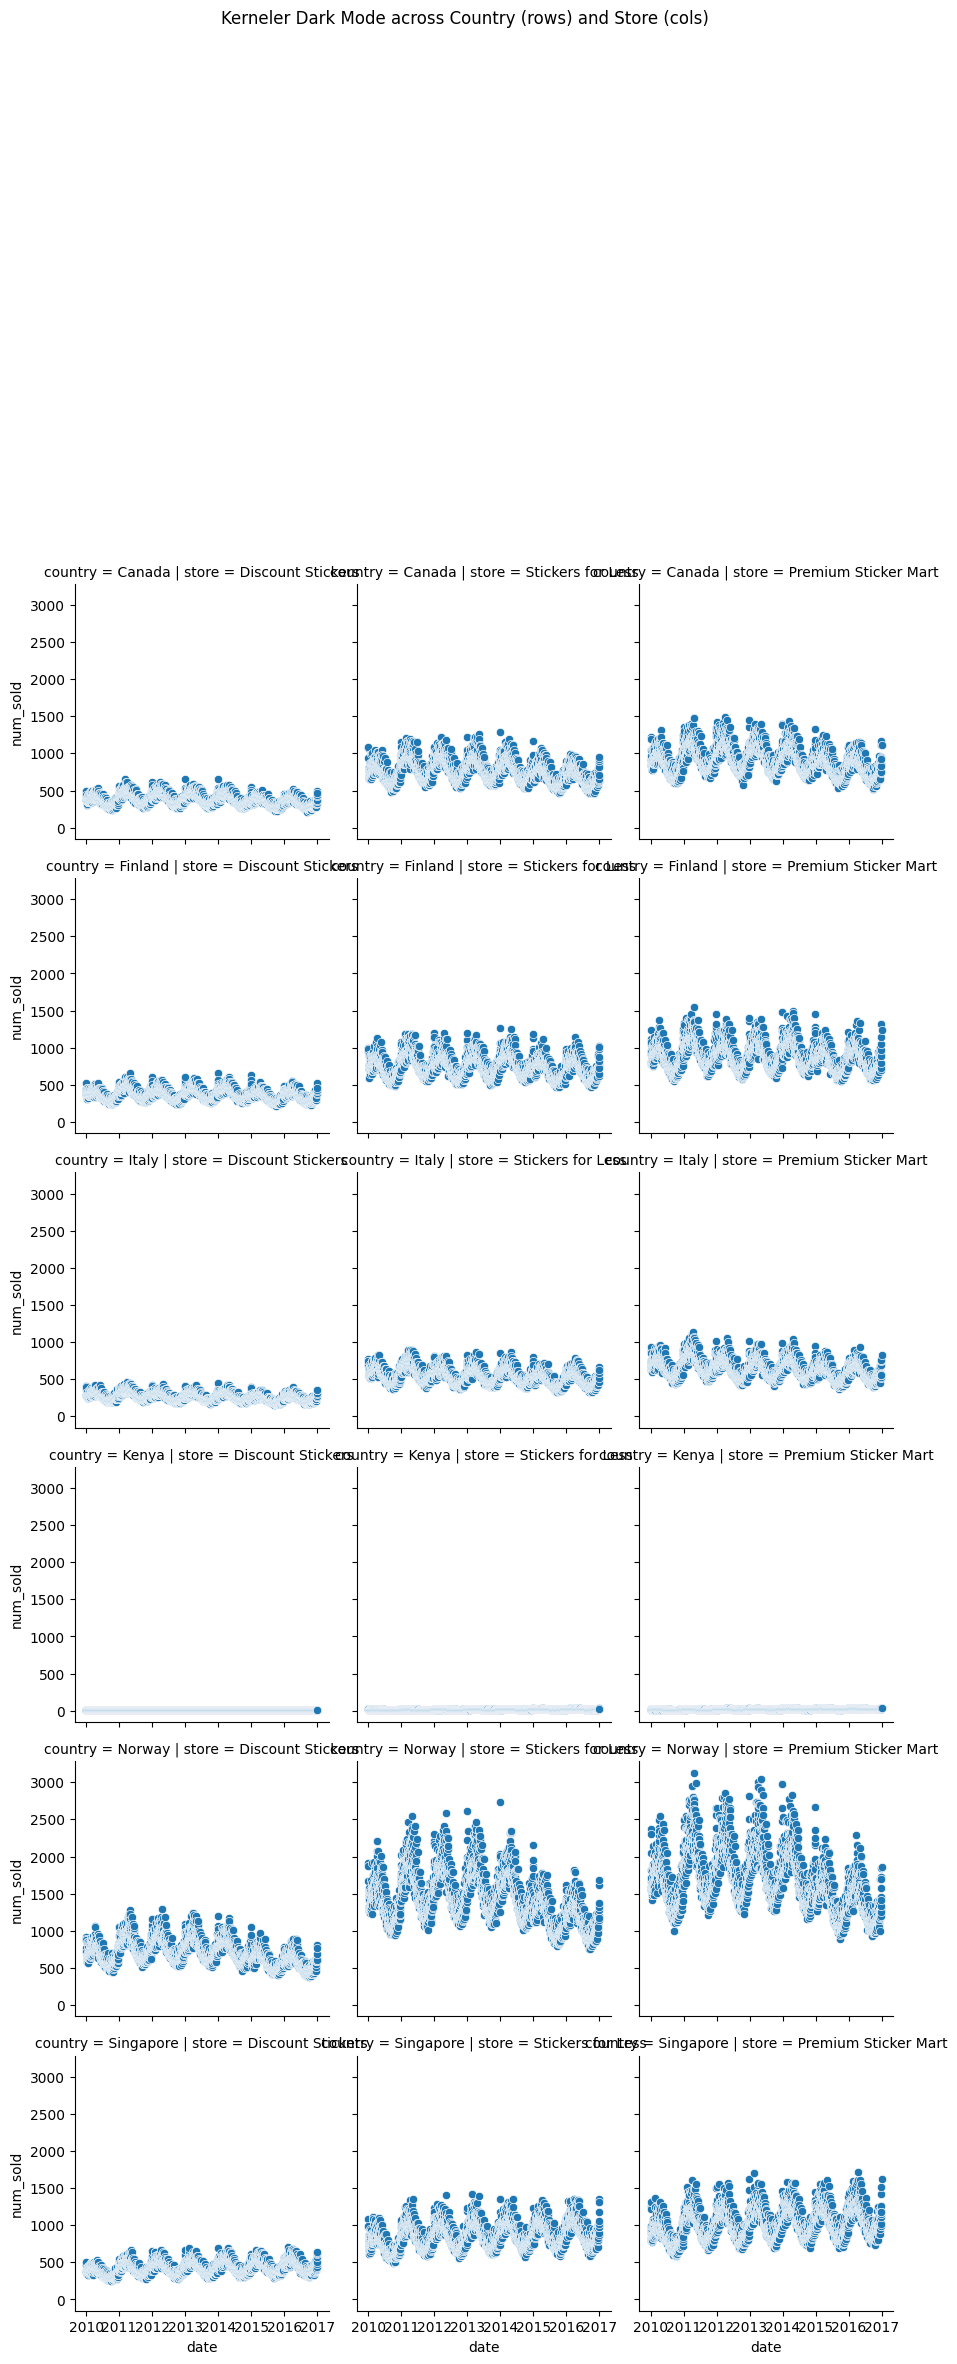

In [4]:
# For each product:
# Graph a relplot of country going across rows, store on cols

for product in train['product'].unique():
    subset = train[train['product'] == product]

    sns.relplot(data=subset, x='date', y='num_sold', col='store', row='country', kind='scatter', height=3, aspect=1)
    plt.suptitle(f'{product} across Country (rows) and Store (cols)', y=1.05)
    plt.show()

In [5]:
# Per product, find:
# 1. Country multiplier
# 2. Store multiplier

product_country = train.groupby(['product', 'country'])['num_sold'].mean().unstack()
product_country = product_country.div(product_country.sum(axis=1), axis=0)*100
display(product_country)
country_effects = product_country.drop('Holographic Goose').mean()
country_effects

country,Canada,Finland,Italy,Kenya,Norway,Singapore
product,,,,,,
Holographic Goose,22.029279,16.199531,11.726082,0.525977,30.825487,18.693644
Kaggle,17.476724,17.187528,12.449436,0.424559,32.649436,19.812316
Kaggle Tiers,17.506084,17.155540,12.450695,0.423405,32.646629,19.817647
Kerneler,17.496274,17.164058,12.450847,0.419528,32.655009,19.814284
Kerneler Dark Mode,17.454658,17.201730,12.442070,0.418717,32.681322,19.801503


country
Canada       17.483435
Finland      17.177214
Italy        12.448262
Kenya         0.421552
Norway       32.658099
Singapore    19.811438
dtype: float64

In [6]:
# Do the same, but per store:
product_store = train.groupby(['product', 'store'])['num_sold'].mean().unstack()
product_store = product_store.div(product_store.sum(axis=1), axis=0)*100
display(product_store)
store_effects = product_store.drop('Holographic Goose').mean()
store_effects

store,Discount Stickers,Premium Sticker Mart,Stickers for Less
product,,,
Holographic Goose,20.502466,41.884846,37.612688
Kaggle,18.481107,44.149585,37.369308
Kaggle Tiers,18.476024,44.164992,37.358984
Kerneler,18.527680,44.109015,37.363305
Kerneler Dark Mode,18.462386,44.168530,37.369083


store
Discount Stickers       18.486799
Premium Sticker Mart    44.148031
Stickers for Less       37.365170
dtype: float64

In [7]:
# Do this shi for everythign
combos = list(itertools.combinations(['store', 'product', 'country'], 2))
combos.extend([reversed(combo) for combo in combos])
for p1, p2 in combos:
    print(p1, p2)
    grouping = train.groupby([p1, p2])['num_sold'].mean().unstack()
    grouping = grouping.div(grouping.sum(axis=1), axis=0)*100
    display(grouping)

store product


product,Holographic Goose,Kaggle,Kaggle Tiers,Kerneler,Kerneler Dark Mode
store,,,,,
Discount Stickers,5.758483,33.578673,27.739101,15.202999,17.720744
Premium Sticker Mart,4.966358,33.864238,27.992464,15.279695,17.897245
Stickers for Less,5.253806,33.766670,27.894369,15.247236,17.837919


store country


country,Canada,Finland,Italy,Kenya,Norway,Singapore
store,,,,,,
Discount Stickers,20.126301,16.606768,12.029397,0.478528,31.585104,19.173902
Premium Sticker Mart,17.845740,17.103034,12.398272,0.439959,32.497318,19.715677
Stickers for Less,18.754176,16.900425,12.245556,0.455186,32.147064,19.497593


product country


country,Canada,Finland,Italy,Kenya,Norway,Singapore
product,,,,,,
Holographic Goose,22.029279,16.199531,11.726082,0.525977,30.825487,18.693644
Kaggle,17.476724,17.187528,12.449436,0.424559,32.649436,19.812316
Kaggle Tiers,17.506084,17.155540,12.450695,0.423405,32.646629,19.817647
Kerneler,17.496274,17.164058,12.450847,0.419528,32.655009,19.814284
Kerneler Dark Mode,17.454658,17.201730,12.442070,0.418717,32.681322,19.801503


product store


store,Discount Stickers,Premium Sticker Mart,Stickers for Less
product,,,
Holographic Goose,20.502466,41.884846,37.612688
Kaggle,18.481107,44.149585,37.369308
Kaggle Tiers,18.476024,44.164992,37.358984
Kerneler,18.527680,44.109015,37.363305
Kerneler Dark Mode,18.462386,44.168530,37.369083


country store


store,Discount Stickers,Premium Sticker Mart,Stickers for Less
country,,,
Canada,20.360401,41.922656,37.716942
Finland,18.468228,44.167732,37.364040
Italy,18.460102,44.181788,37.358110
Kenya,19.896438,42.478806,37.624756
Norway,18.475429,44.141958,37.382612
Singapore,18.486568,44.141728,37.371703


country product


product,Holographic Goose,Kaggle,Kaggle Tiers,Kerneler,Kerneler Dark Mode
country,,,,,
Canada,6.235719,33.402432,27.647467,15.091255,17.623126
Finland,4.741932,33.970199,28.018014,15.309689,17.960166
Italy,4.736483,33.953497,28.059294,15.324823,17.925903
Kenya,6.168540,33.619043,27.704575,14.992362,17.515479
Norway,4.746079,33.941612,28.044224,15.320337,17.947748
Singapore,4.744086,33.948891,28.060199,15.322529,17.924294


# So
Ig we just drop Holographic goose and average shit, and thats its effect

We want normalized values

In [8]:
cleaned = train[train['product'] != 'Holographic Goose']

product_effects = cleaned.groupby('product')['num_sold'].mean()
store_effects = cleaned.groupby('store')['num_sold'].mean()
store_effects = store_effects / store_effects.mean()
country_effects = cleaned.groupby('country')['num_sold'].mean()
country_effects = country_effects / country_effects.mean()

display(product_effects)
display(store_effects)
display(country_effects)

product
Kaggle                1232.384587
Kaggle Tiers          1018.344110
Kerneler               556.913102
Kerneler Dark Mode     651.042021
Name: num_sold, dtype: float64

store
Discount Stickers       0.554677
Premium Sticker Mart    1.324443
Stickers for Less       1.120880
Name: num_sold, dtype: float64

country
Canada       1.049068
Finland      1.030615
Italy        0.746915
Kenya        0.025357
Norway       1.959320
Singapore    1.188724
Name: num_sold, dtype: float64

In [9]:
actual_averages = cleaned.groupby(['product', 'store', 'country'])['num_sold'].mean().reset_index()

df = product_effects.reset_index().merge(store_effects.reset_index(), how="cross").merge(country_effects.reset_index(), how="cross")
df['prediction'] = df['num_sold'] * df['num_sold_x'] * df['num_sold_y']
df = df.drop(columns=[col for col in df.columns if 'num_sold' in col])

actual_averages = actual_averages.merge(df, how='left')
actual_averages['difference'] = actual_averages['num_sold'] - actual_averages['prediction']
actual_averages.sort_values(by='difference', ascending=False)

,product,store,country,num_sold,prediction,difference
70,Kerneler Dark Mode,Stickers for Less,Norway,1432.892452,1429.794679,3.097773
24,Kaggle Tiers,Premium Sticker Mart,Canada,1417.701995,1414.919258,2.782737
61,Kerneler Dark Mode,Premium Sticker Mart,Finland,890.979664,888.666501,2.313163
7,Kaggle,Premium Sticker Mart,Finland,1684.023074,1682.193874,1.829200
5,Kaggle,Discount Stickers,Singapore,814.008995,812.581832,1.427163
...,...,...,...,...,...,...
40,Kerneler,Discount Stickers,Norway,603.490418,605.247168,-1.756749
25,Kaggle Tiers,Premium Sticker Mart,Finland,1388.125147,1390.030548,-1.905402
66,Kerneler Dark Mode,Stickers for Less,Canada,763.250293,765.547273,-2.296980
11,Kaggle,Premium Sticker Mart,Singapore,1937.877591,1940.262731,-2.385140


In [12]:
# What about holographic goose?
chosen_store = 'Premium Sticker Mart'
chosen_store = 'Stickers for Less'
chosen_country = 'Canada'
train[(train['product'] == 'Holographic Goose') & (train['store'] == chosen_store) & (train['country'] == chosen_country)]['num_sold'].mean() \
    / country_effects[chosen_country] / store_effects[chosen_store]

194.59184499052185

In [16]:
country_effects

country
Canada       1.049068
Finland      1.030615
Italy        0.746915
Kenya        0.025357
Norway       1.959320
Singapore    1.188724
Name: num_sold, dtype: float64

In [26]:
testing = train[train['product'] != 'Holographic Goose']
testing['day_of_week'] = train['date'].dt.day_of_week
testing['day_of_year'] = train['date'].dt.day_of_year

grouping = testing.groupby(['country', 'day_of_year'])['num_sold'].mean().unstack()
grouping.div(grouping.sum(axis=1), axis=0)*100

/var/folders/_c/j62lsd3n7x9_vq272kdsl3fc0000gn/T/ipykernel_91286/2993544366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing['day_of_week'] = train['date'].dt.day_of_week
/var/folders/_c/j62lsd3n7x9_vq272kdsl3fc0000gn/T/ipykernel_91286/2993544366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing['day_of_year'] = train['date'].dt.day_of_year


day_of_year,1,2,3,4,5,6,7,8,9,10,...,357,358,359,360,361,362,363,364,365,366
country,,,,,,,,,,,,,,,,,,,,,
Canada,0.326784,0.307761,0.307668,0.294098,0.296120,0.292560,0.287943,0.294450,0.286523,0.281224,...,0.262187,0.275083,0.281479,0.294654,0.308292,0.326143,0.347248,0.349073,0.356351,0.327354
Finland,0.340174,0.313148,0.305124,0.288996,0.291160,0.288372,0.281038,0.289234,0.294386,0.297210,...,0.257117,0.272712,0.280973,0.302971,0.320226,0.350745,0.370985,0.374335,0.369416,0.348580
Italy,0.337091,0.309654,0.307499,0.286330,0.294060,0.288410,0.283420,0.292317,0.293123,0.301054,...,0.260021,0.271356,0.278934,0.294437,0.306270,0.329795,0.352464,0.357076,0.360324,0.333629
Kenya,0.335350,0.318597,0.321711,0.313260,0.312964,0.303624,0.287612,0.285981,0.279310,0.277086,...,0.258110,0.267450,0.279310,0.294284,0.307478,0.333719,0.356402,0.358626,0.363370,0.391242
Norway,0.337533,0.312254,0.304729,0.289589,0.288687,0.287639,0.277703,0.282390,0.278946,0.276620,...,0.259048,0.269817,0.276261,0.289067,0.305194,0.333541,0.353718,0.358333,0.359759,0.324566
Singapore,0.321073,0.302412,0.303899,0.287620,0.293007,0.291068,0.283501,0.281923,0.277491,0.275289,...,0.260298,0.273271,0.277175,0.292178,0.304326,0.322034,0.343314,0.341774,0.344624,0.353788
